## Máquinas de soporte vectorial (SVM)

Es un algoritmo de aprendizaje supervisado donde el objetivo es maximizar el margen definido por la distancia entre el hiperplano de separación y los puntos (de los datos de entrenamiento) más cercanas al hiperplano. Estos puntos son denominados _vectores soporte_.

La idea que hay detrás de las SVM de _margen máximo_ consiste en seleccionar el hiperplano separador que está a la misma distancia de los puntos más cercanos de cada clase.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas


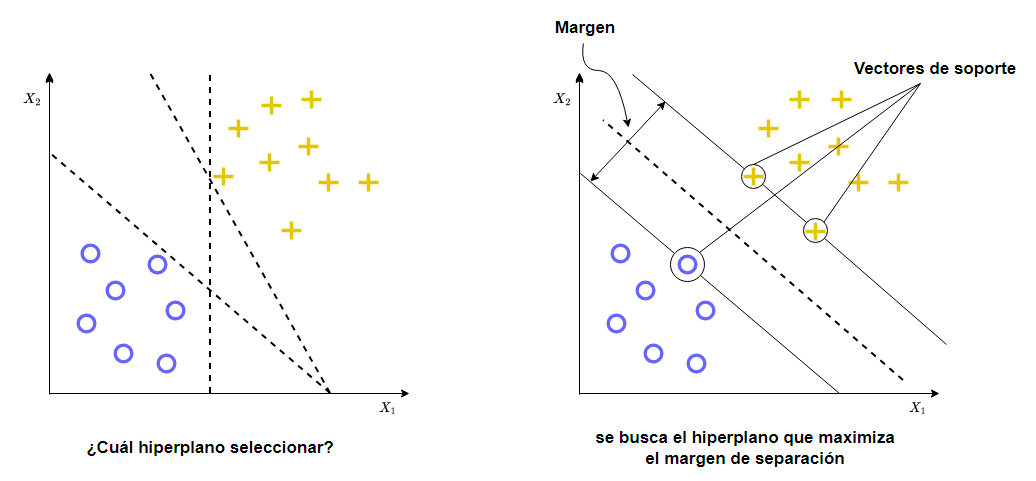

In [4]:
#import sys
#from IPython.display import Image, display
#if 'google.colab' in sys.modules:
#    from google.colab import drive
#    drive.mount('/content/drive')
#    %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

#display(Image(filename='./2_imagenes/SVM_1.png', width=700))

Las SVM tienen en su implementación una variable de holgura _C_ que permite que las restricciones no se cumplan de manera estricta. Esto es necesario en el caso de conjuntos que no son linealmente separables.

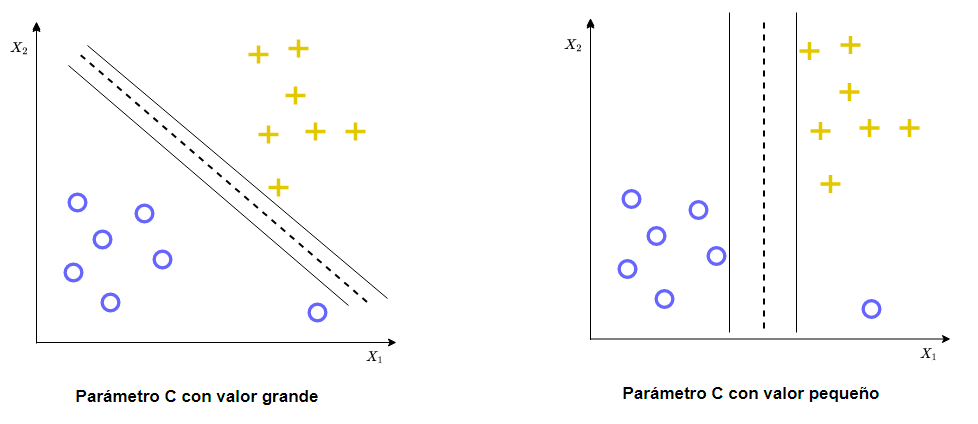

In [ ]:
#display(Image(filename='./2_imagenes/SVM_2.png', width=700))

Es un modelo muy sensible a la diferencia de escalas de los atributos

A continuación vamos a usar las SVM con algunos datasets guardados en la carpeta `1_datos`

In [56]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from modulos.graficacion import plot_decision_regions

### Dataset Nº 1

In [57]:
# Dataset data1.mat
import scipy.io as sio
archivo_mat = sio.loadmat('1_datos/data1.mat')

X = archivo_mat['X']
y = archivo_mat['y'].flatten()

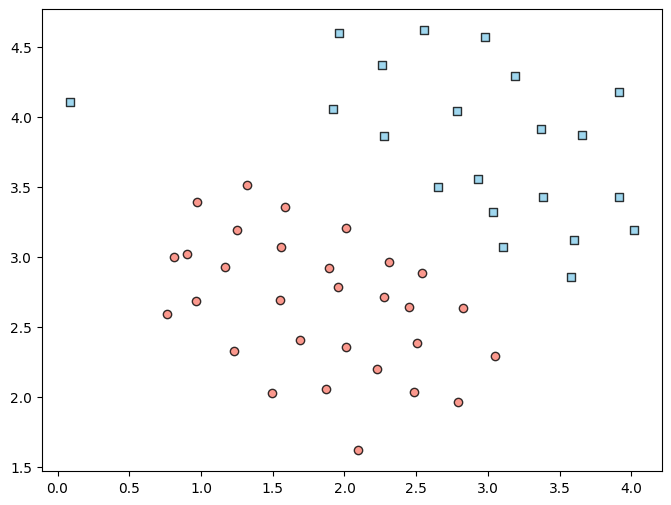

In [58]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.show()

Este dataset es linealmente separable. Notar que se tiene un outlier en una de las clases.

Probar con diferentes valores del parámetro C de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) de scikit-learn y ver qué efecto tiene la presencia del outlier en la región de separación.

In [59]:
# Escalamos los datos
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)

In [60]:
# Probamos diferentes valores del parámetro C
valores_C = [0.98, 2.5, 4, 7, 100]

Precisión para el valor de C=0.98: 0.9803921568627451


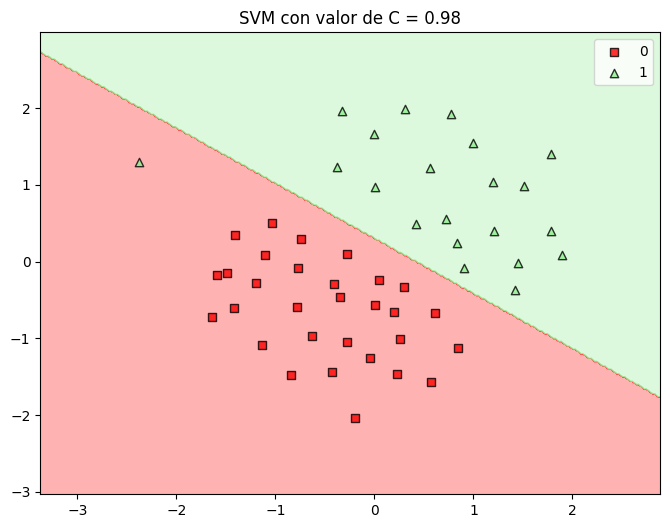

Precisión para el valor de C=2.5: 0.9803921568627451


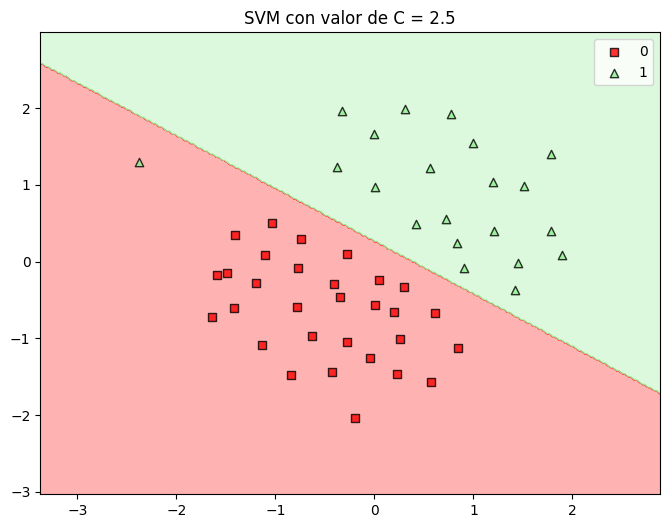

Precisión para el valor de C=4: 0.9803921568627451


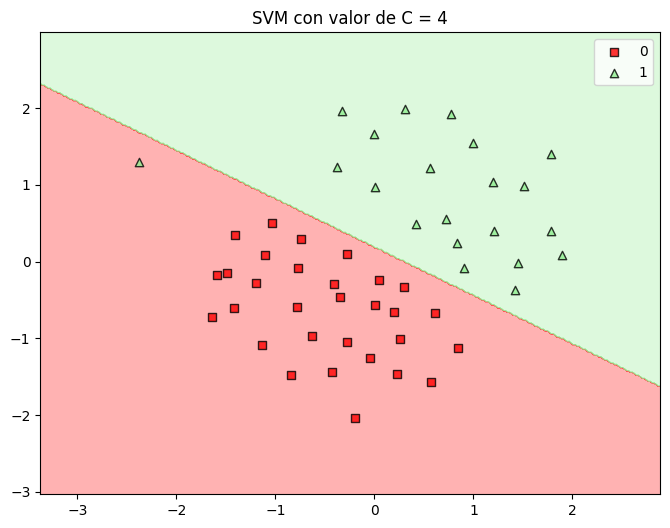

Precisión para el valor de C=7: 0.9803921568627451


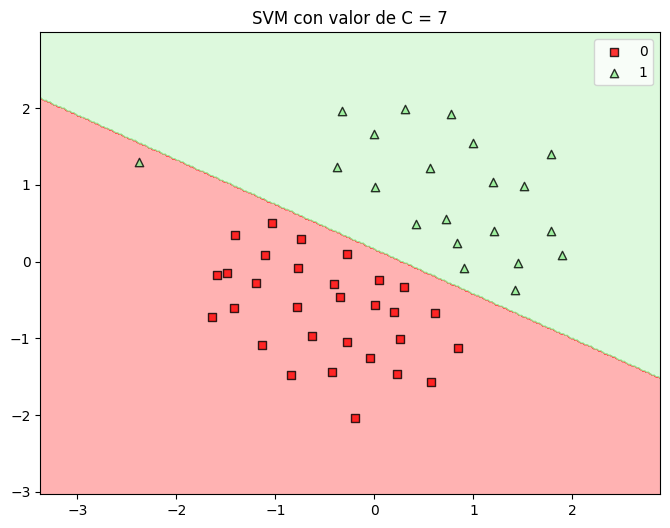

Precisión para el valor de C=100: 1.0


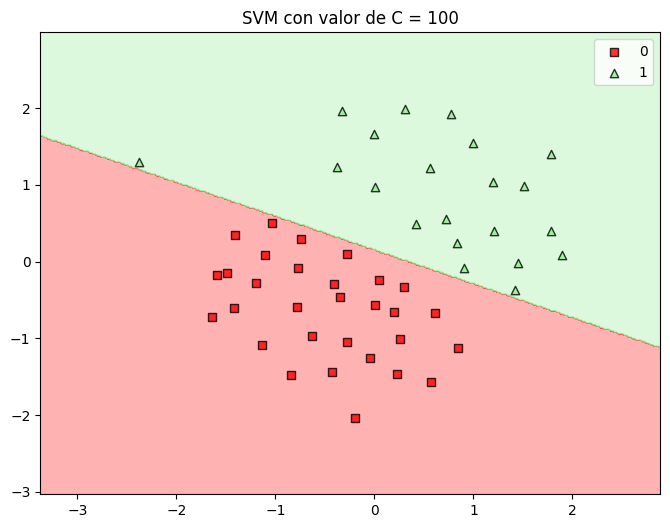

In [61]:
#Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions
for valor_c in valores_C:
    # Modelo SVM
    svc = SVC(C = valor_c, kernel = 'linear')
    svc.fit(X_train_std, y)
    
    # Evaluación del modelo
    precision = svc.score(X_train_std, y)
    print(f"Precisión para el valor de C={valor_c}: {precision}")

    # Gráfico
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train_std, y, svc)
    
    plt.title(f'SVM con valor de C = {valor_c}')
    plt.legend()
    plt.show()

### Dataset Nº 2
### SVM con kernel Gaussiano

In [62]:
# Dataset data2.mat
archivo_mat_2 = sio.loadmat('1_datos/data2.mat')
X_2 = archivo_mat_2['X']
y_2 = archivo_mat_2['y'].flatten()
X_2.shape

(863, 2)

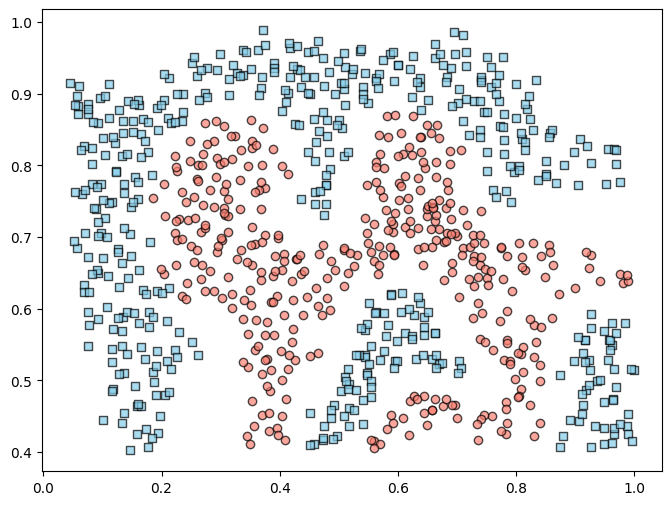

In [63]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_2)):
    plt.scatter(x=X_2[y_2 == cl, 0],
                y=X_2[y_2 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Como verá de la gráfica, los datos no son linealmente separables. Con el kernel Gaussiano, el algoritmo del SVM podrá encontrar la región de decisión capaz de separar los datos correctamente y seguir los contornos del dataset.

In [64]:
# Escalamos los datos
sc = StandardScaler()
sc.fit(X_2)
X_train_std_2 = sc.transform(X_2)

Uno de los _kernels_ más utilizado es el __radial basis function__ (RBF), que se conoce como __kernel Gaussiano__. Vea la documentación de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) para utilizar este kernel.

Un parámetro adicional al utilizar este kernel es el parámetro **gamma**. Este indica cuánta influencia tiene una sola muestra, haciendo que el límite de decisión se ajuste mucho más a las muestras. **Pruebe con diferentes valores de gamma para ver el efecto del mismo.**

La idea principal detrás del uso de _kernels_ con datos que no son linealmente separables, es crear combinaciones no lineales de las características originales y proyectarlas en un espacio de mayor dimensión (mapeo mediante una función), donde los datos se vuelven linealmente separables

Precisión para el valor de gamma=0.1: 0.8215527230590962


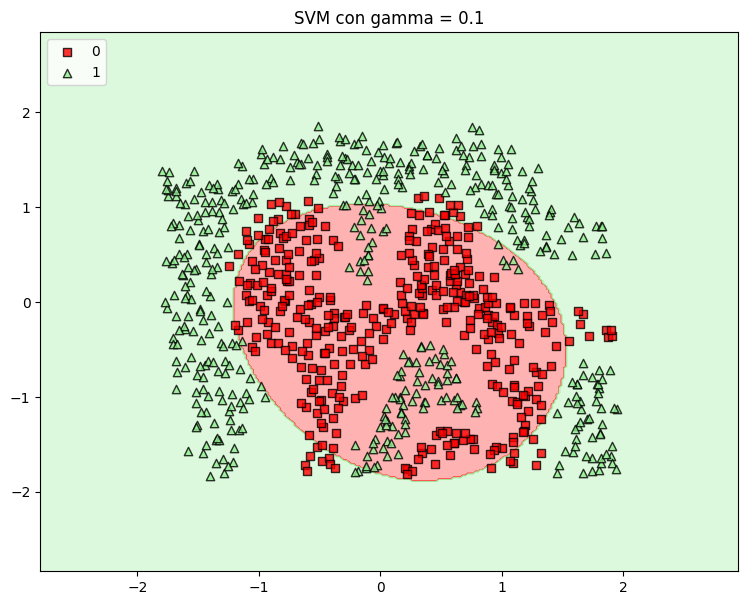

Precisión para el valor de gamma=10: 0.9988412514484357


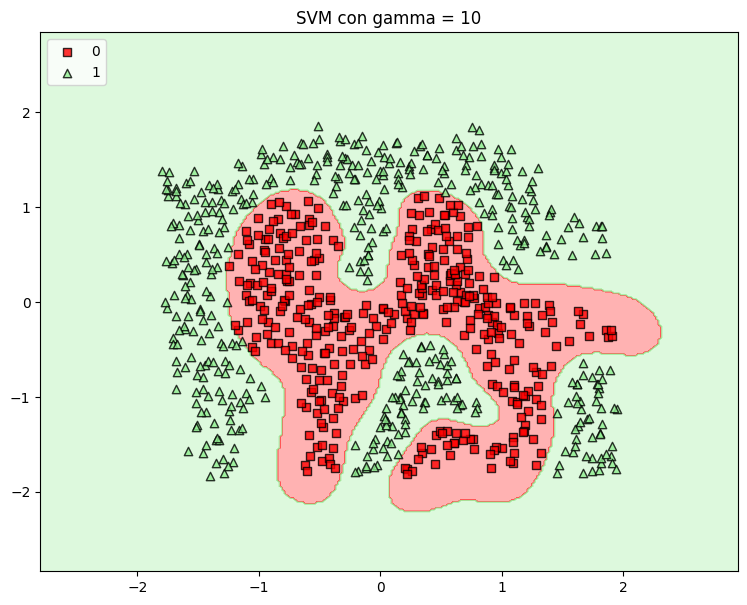

Precisión para el valor de gamma=50: 1.0


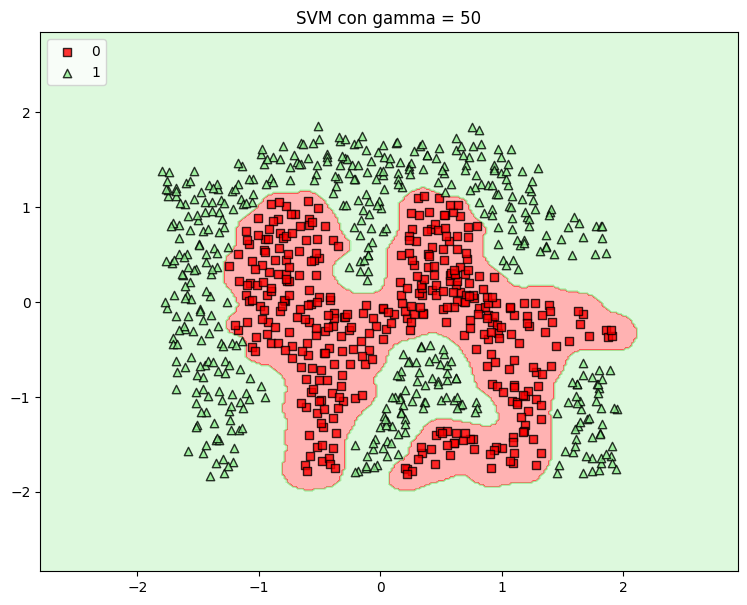

Precisión para el valor de gamma=100: 1.0


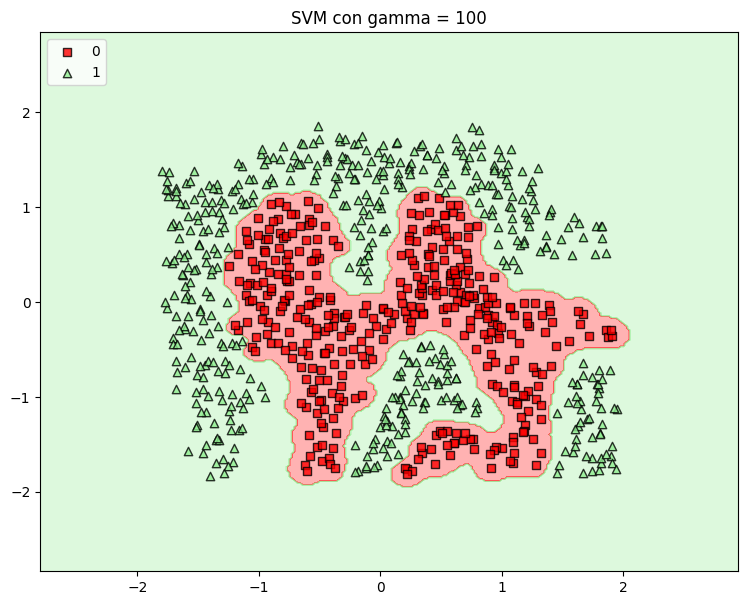

Precisión para el valor de gamma=300: 1.0


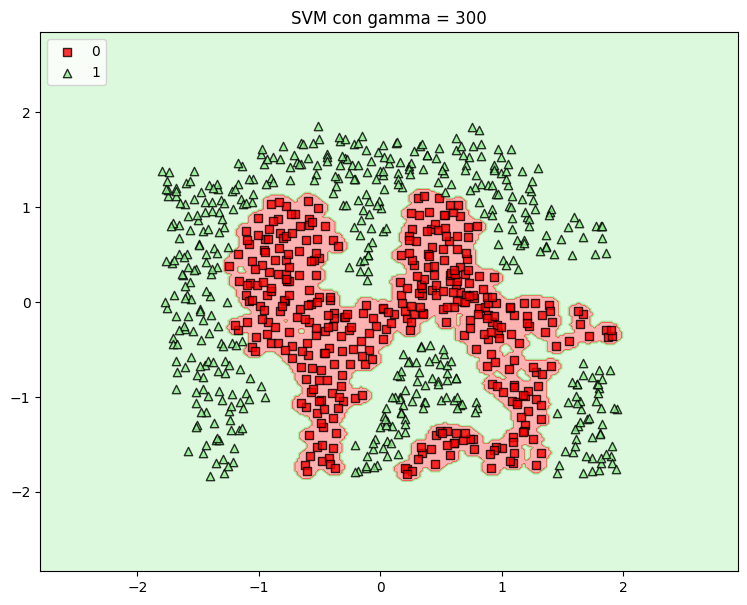

Precisión para el valor de gamma=500: 1.0


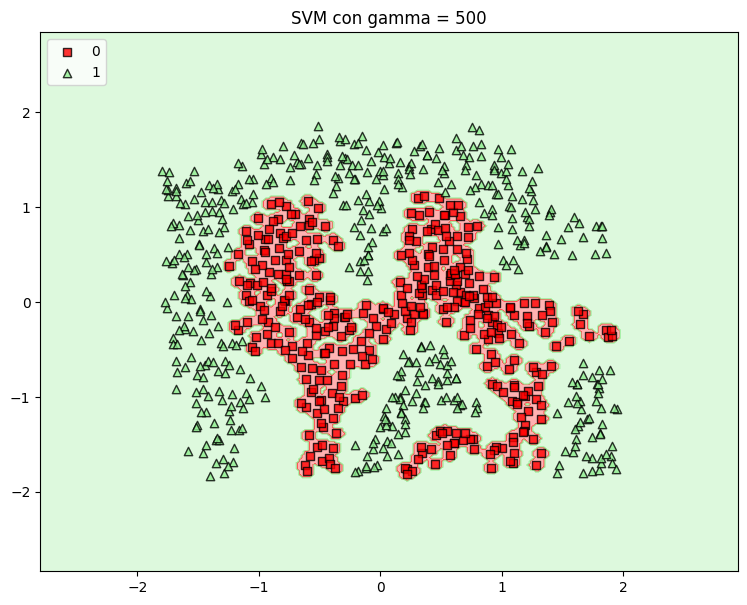

In [55]:
# Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions
valores_gamma = [0.1, 10, 50, 100, 300, 500]

for valor in valores_gamma:
    # Modelo SVM
    svc = SVC(kernel='rbf', gamma=valor)
    svc.fit(X_train_std_2, y_2)

    # Evaluación del modelo
    precision = svc.score(X_train_std_2, y_2)
    print(f"Precisión para el valor de gamma={valor}: {precision}")

    # Gráfico
    plt.figure(figsize=(9, 7))
    plot_decision_regions(X_train_std_2, y_2, svc)

    #plt.xlim(-0.25, 1.25)
    #plt.ylim(0, 1.25)

    plt.title(f'SVM con gamma = {valor}')
    plt.legend(loc='upper left')
    plt.show()

### Dataset Nº 3
El siguiente dataset _data3.mat_ posee datos para entrenamiento (_X_, _y_) y datos de prueba (_X_test_, _y_test_)

In [65]:
# Dataset data3.mat
archivo_mat_3 = sio.loadmat('1_datos/data3.mat')
X_3 = archivo_mat_3['X']
y_3 = archivo_mat_3['y'].flatten()
X_test_3 = archivo_mat_3['Xval']
y_test_3 = archivo_mat_3['yval'].flatten()
print(X_3.shape)
print(X_test_3.shape)

(211, 2)
(200, 2)


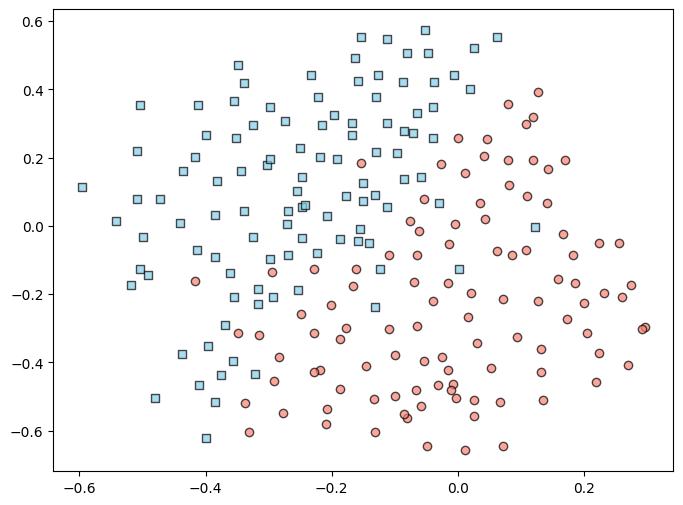

In [66]:
# Visualizamos los datos de entrenamiento
markers = ('o' ,'s', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_3)):
    plt.scatter(x=X_3[y_3 == cl, 0],
                y=X_3[y_3 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Este conjunto de datos no es linealmente separable. Una forma de obtener los mejores parámetros de una SVM para resolver este problema, es hacer una búsqueda en cuadrícula (GridSearch). Implemente un algoritmo que evalue SVMs con diferentes parámetros mediante validación cruzada (utilice la función [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) con 5 particiones). Obtenga la combinación de valores de C y gamma que resulte en un mejor desempeño de la SVM.

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_3)
X_3_std = sc.transform(X_3)
X_test_3_std = sc.transform(X_test_3)
X_3_std.shape

(211, 2)

[-0.33019673 -1.23982697 -0.12861751]
Precisión para C=0.01 y gamma=0.01: 0.5023696682464455


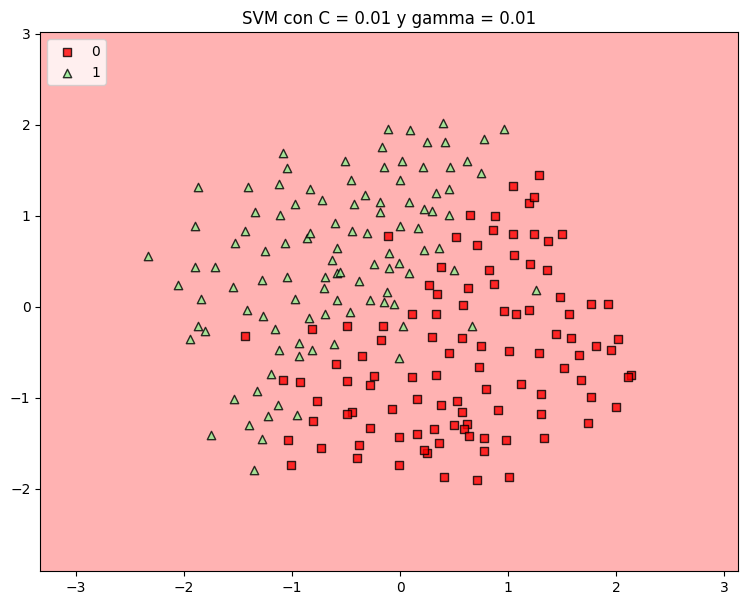

Precisión para C=0.01 y gamma=10: 0.5023696682464455


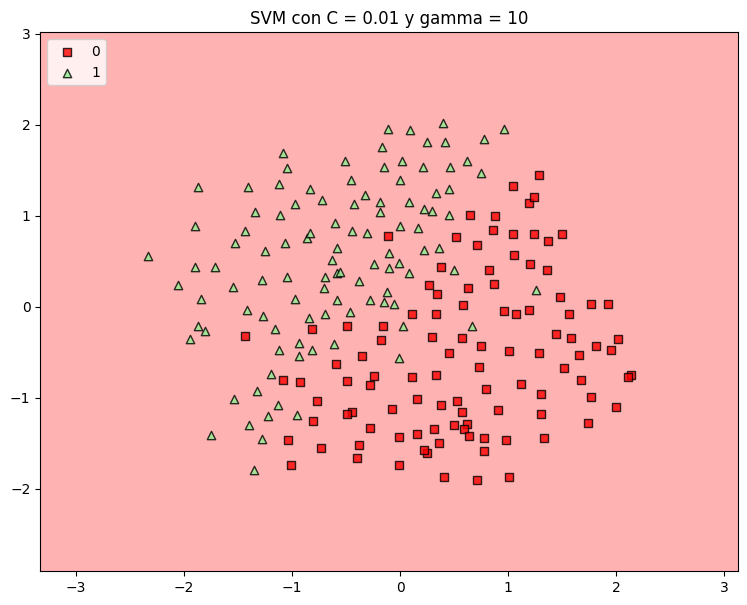

Precisión para C=0.01 y gamma=300: 0.5023696682464455


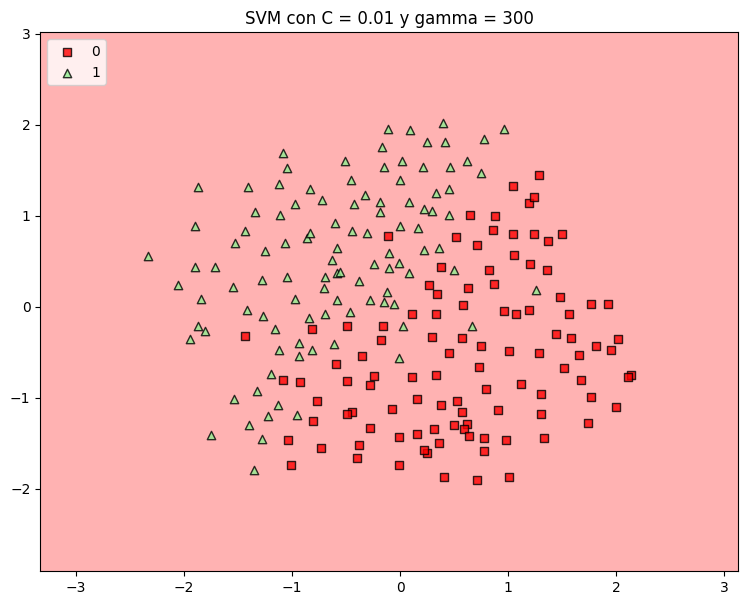

Precisión para C=10 y gamma=0.01: 0.9289099526066351


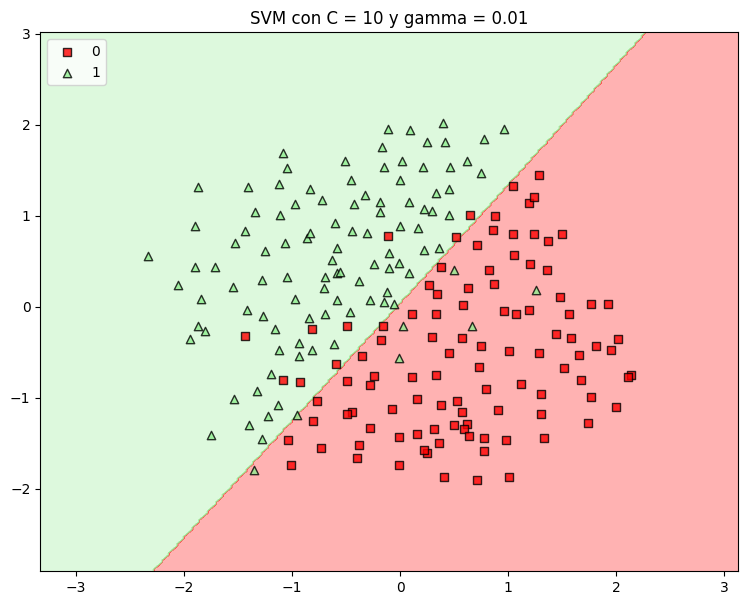

Precisión para C=10 y gamma=10: 0.990521327014218


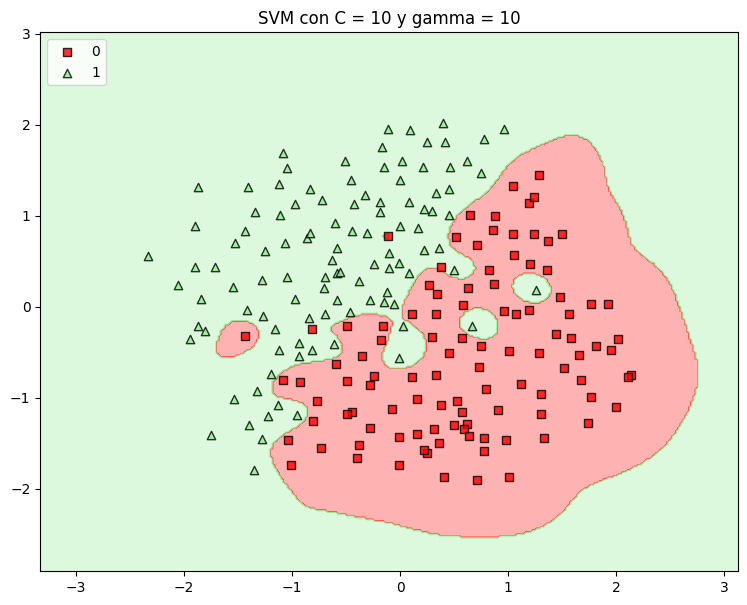

Precisión para C=10 y gamma=300: 1.0


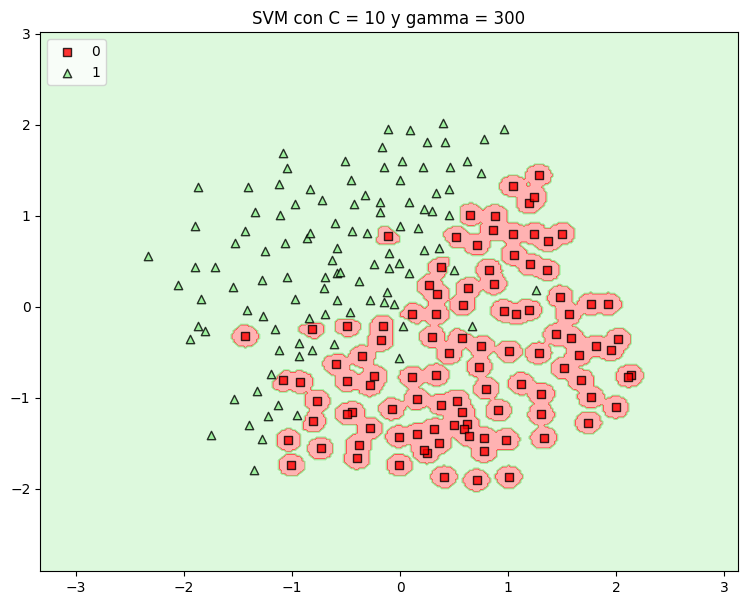

Precisión para C=100 y gamma=0.01: 0.9241706161137441


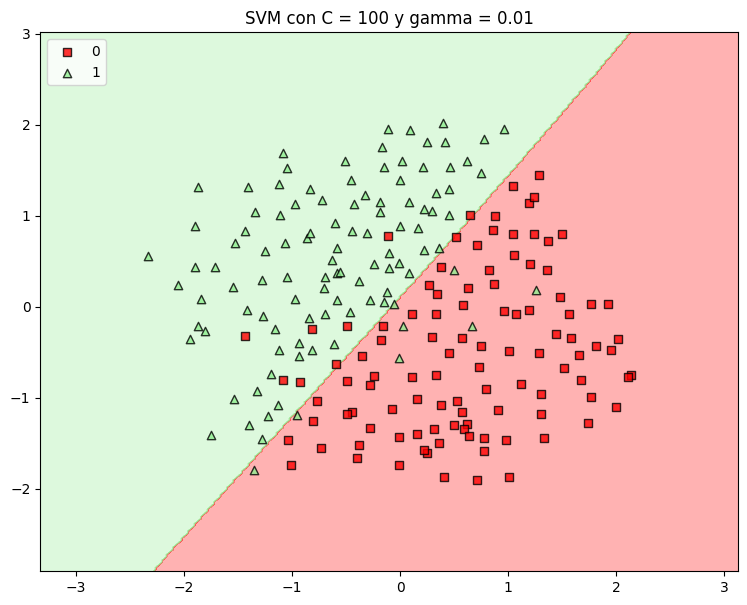

Precisión para C=100 y gamma=10: 1.0


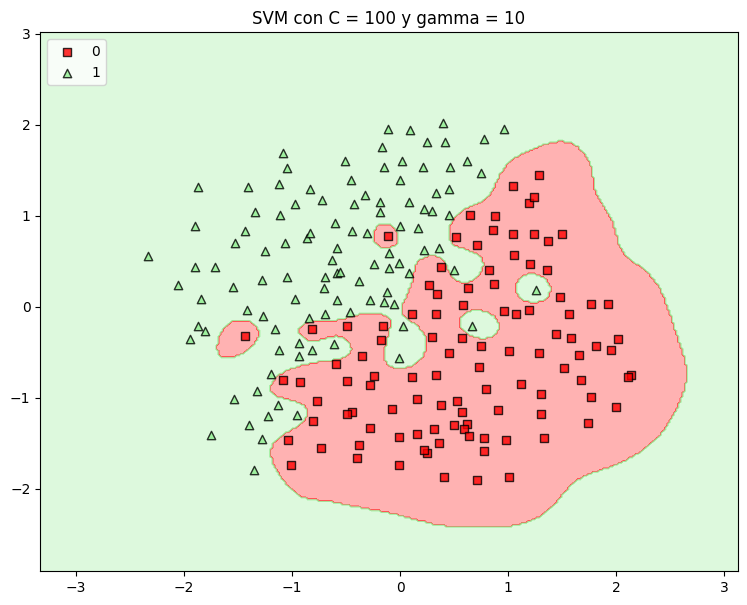

Precisión para C=100 y gamma=300: 1.0


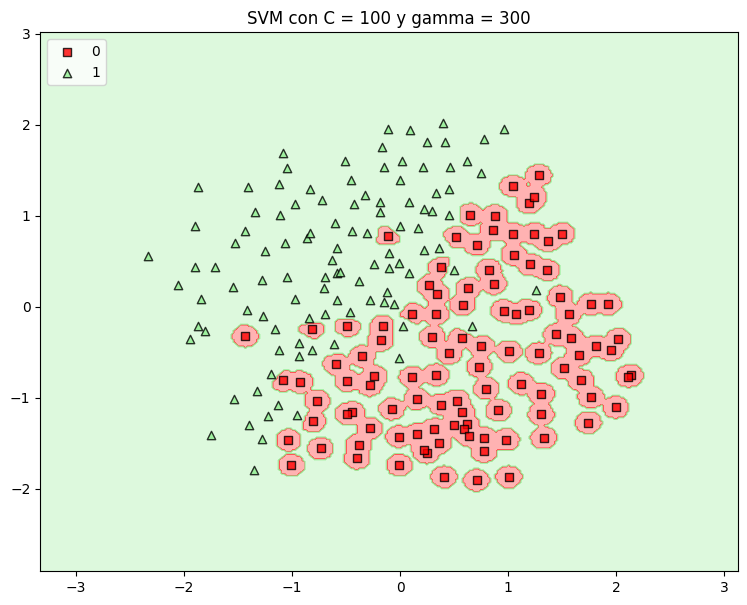

In [73]:
from sklearn.model_selection import cross_val_score

#valores_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
#valores_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]
valores_C = [0.01, 10, 100]
valores_gamma = [0.01, 10, 300]

#------------------------------------
from sklearn import linear_model

lasso = linear_model.Lasso()
print(cross_val_score(lasso, X_3_std, y_3, cv=3))

# Evaluación del modelo SVM con diferentes valores de C y gamma
for valor_C in valores_C:
    for valor_gamma in valores_gamma:
        # Modelo SVM
        svc = SVC(kernel='rbf', C=valor_C, gamma=valor_gamma)
        svc.fit(X_3_std, y_3)

        # Evaluación del modelo
        precision = svc.score(X_3_std, y_3)
        print(f"Precisión para C={valor_C} y gamma={valor_gamma}: {precision}")

        # Gráfico
        plt.figure(figsize=(9, 7))
        plot_decision_regions(X_3_std, y_3, svc)
        
        plt.title(f'SVM con C = {valor_C} y gamma = {valor_gamma}')
        plt.legend(loc='upper left')
        plt.show()

## Grid search usando sklearn

Repita el proceso anterior usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) de scikit-learn y compare los resultados obtenidos de C y gamma.

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir el espacio de búsqueda
parametros = {
    'C': [0.01, 10, 100],
    'gamma': [0.01, 10, 100]
}

# Inicializar SVM
svm = SVC()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = svm, param_grid = parametros, scoring = 'accuracy', cv = 5, verbose = 4)
grid_search.fit(X_3_std, y_3)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.860 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 1/5] END ..................C=0.01, gamma=10;, score=0.884 total time=   0.0s
[CV 2/5] END ..................C=0.01, gamma=10;, score=0.500 total time=   0.0s
[CV 3/5] END ..................C=0.01, gamma=10;, score=0.500 total time=   0.0s
[CV 4/5] END ..................C=0.01, gamma=10;, score=0.500 total time=   0.0s
[CV 5/5] END ..................C=0.01, gamma=10;, score=0.500 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=100;, score=0.698 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=100;,

Con los valores de C y gamma obtenidos, entrene una SVM, grafique la frontera de decisión con `plot_decision_regions` mostrando los datos de entrenamiento y prueba y evalúe el desempeño obtenido con los datos de prueba.

In [75]:
# Entrenamiento
best_svm = SVC(C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_3_std, y_3)

SVC(C=100, gamma=0.01)

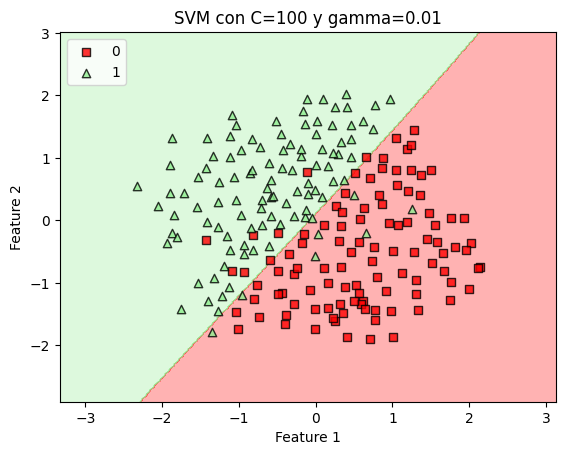

In [76]:
#Grafico la frontera de decisión, muestro los datos de entrenamiento y prueba
# Crear un array que contiene los índices de las muestras de prueba
#test_idx = range(len(y_train_3), len(y_train_3) + len(y_test_3))

# Combinar los datos de entrenamiento y prueba para la visualización
X_combined = np.vstack((X_3_std, X_test_3))
y_combined = np.hstack((y_3, y_test_3))

# Graficar la frontera de decisión
plot_decision_regions(X_3_std, y_3, best_svm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title(f"SVM con C={best_params['C']} y gamma={best_params['gamma']}")
plt.show()

In [77]:
# Evaluar el desempeño en los datos de prueba
y_test_pred = best_svm.predict(X_test_3)
accuracy = accuracy_score(y_test_3, y_test_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.2f}")

Exactitud en el conjunto de prueba: 0.91
